In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
from sklearn import preprocessing
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import confusion_matrix

In [14]:
dataset=pd.read_csv('C:\\Users\\USER\\Desktop\\Anasa\\anemia.csv')
dataset.head(4)

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0


In [15]:
#getting the info of dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1421 non-null   int64  
 1   Hemoglobin  1421 non-null   float64
 2   MCH         1421 non-null   float64
 3   MCHC        1421 non-null   float64
 4   MCV         1421 non-null   float64
 5   Result      1421 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 66.7 KB


In [16]:
#checking missing value
dataset.isnull().sum()

Gender        0
Hemoglobin    0
MCH           0
MCHC          0
MCV           0
Result        0
dtype: int64

Getting the results of the people with anaemia

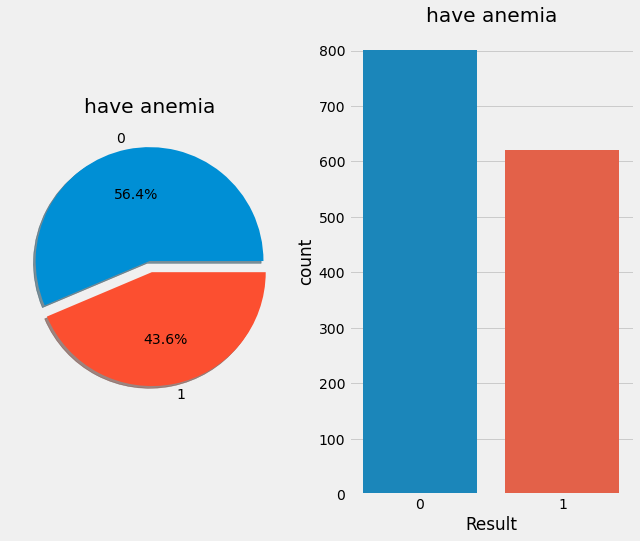

In [20]:
f,ax=plt.subplots(1,2,figsize=(10,8))
dataset['Result'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('have anemia')
ax[0].set_ylabel('')
sns.countplot('Result',data=dataset,ax=ax[1])
ax[1].set_title('have anemia')
plt.show()

Getting continous feature :

In [23]:
#continous feature of MCv
print('The highest of MCV:',dataset['MCV'].max())
print('The lowest of MCV:',dataset['MCV'].min())
print('The average of Mcv in the data:',dataset['MCV'].mean())

The highest of MCV: 101.6
The lowest of MCV: 69.4
The average of Mcv in the data: 85.52378606615068


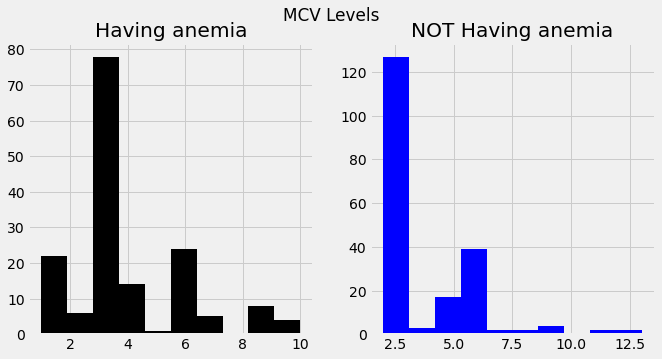

In [32]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
data_len=dataset[dataset['Result']==1]['MCV'].value_counts()
ax1.hist(data_len,color='black')
ax1.set_title('Having anemia')
data_len=dataset[dataset['Result']==0]['MCV'].value_counts()
ax2.hist(data_len,color='blue')
ax2.set_title('NOT Having anemia')
fig.suptitle('MCV Levels')
plt.show()

In [33]:
# See the min, max, mean values
print('The highest hemoglobin was of:',dataset['Hemoglobin'].max())
print('The lowest hemoglobin was of:',dataset['Hemoglobin'].min())
print('The average hemoglobin in the data:',dataset['Hemoglobin'].mean())

The highest hemoglobin was of: 16.9
The lowest hemoglobin was of: 6.6
The average hemoglobin in the data: 13.41273750879661


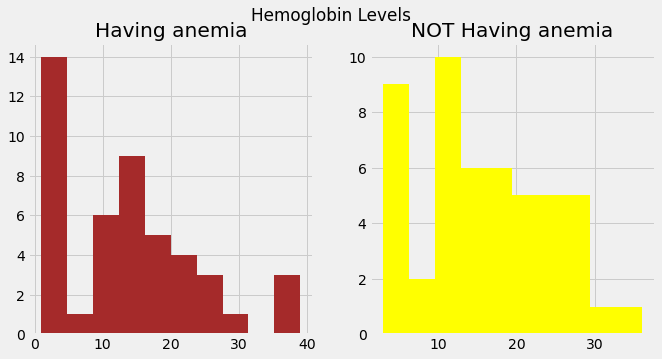

In [34]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
data_len=dataset[dataset['Result']==1]['Hemoglobin'].value_counts()
ax1.hist(data_len,color='brown')
ax1.set_title('Having anemia')
data_len=dataset[dataset['Result']==0]['Hemoglobin'].value_counts()
ax2.hist(data_len,color='yellow')
ax2.set_title('NOT Having anemia')
fig.suptitle('Hemoglobin Levels')
plt.show()

# Feature engineering

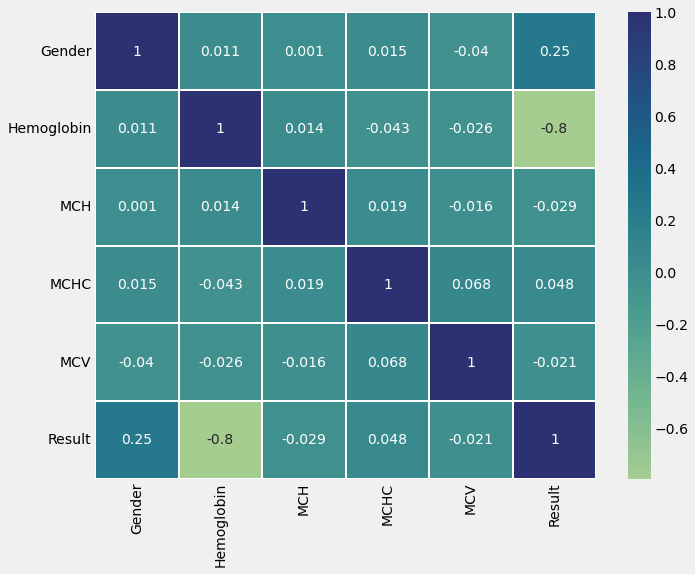

In [37]:
sns.heatmap(dataset.corr(),annot=True,cmap='crest',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [42]:
d = preprocessing.normalize(dataset.iloc[:,1:5], axis=0)
scaled_df = pd.DataFrame(d, columns=["MCv", "MCHC", "MCH","Hemoglobin"])
scaled_df.head()

,MCv,MCHC,MCH,Hemoglobin
0,0.029155,0.025904,0.025491,0.025799
1,0.031112,0.028985,0.024790,0.022193
2,0.017611,0.024535,0.025929,0.021946
3,0.029155,0.018258,0.027506,0.026970
4,0.028764,0.025105,0.024703,0.030669


Splitting data into train and test set

In [43]:
x=dataset[dataset.columns[:-1]]
y=dataset['Result']

In [44]:
train,test=train_test_split(dataset,test_size=0.2,random_state=2,stratify=dataset['Result'])
train_x=train[train.columns[:-1]]
train_y=train[train.columns[-1:]]
test_x=test[test.columns[:-1]]
test_y=test[test.columns[-1:]]

In [49]:
print(len(train_x))
print(len(test_x))

1136
285


# Logistic regression

In [50]:
model=LogisticRegression()
model.fit(train_x,train_y)

LogisticRegression()

In [53]:
prediction1=model.predict(test_x)
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(prediction1,test_y))

The accuracy of the Logistic Regression is: 0.9824561403508771


# Random forest

In [55]:
model=RandomForestClassifier()
model.fit(train_x,train_y)
prediction2=model.predict(test_x)
print('The accuracy of Random Forest is:',metrics.accuracy_score(prediction2,test_y))

The accuracy of Random Forest is: 1.0


# Decision Tree

In [58]:
model=DecisionTreeClassifier()
model.fit(train_x,train_y)
prediction3=model.predict(test_x)
print('The accuracy of Decision Tree is:',metrics.accuracy_score(prediction3,test_y))

The accuracy of Decision Tree is: 1.0


# Gaussian naive bayes

In [59]:
model=GaussianNB()
model.fit(train_x,train_y)
prediction4=model.predict(test_x)
print('The accuracy of Gaussian Naive Bayes is:',metrics.accuracy_score(prediction4,test_y))

The accuracy of Gaussian Naive Bayes is: 0.9368421052631579


# svm

In [61]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_x,train_y)
prediction5=model.predict(test_x)
print('The accuracy score of SVM is:',metrics.accuracy_score(prediction5,test_y))

The accuracy score of SVM is: 0.9754385964912281


# k-nearest Neighbours

In [62]:
model=KNeighborsClassifier() 
model.fit(train_x,train_y)
prediction6=model.predict(test_x)
print('The accuracy of the KNN is:',metrics.accuracy_score(prediction6,test_y))

The accuracy of the KNN is: 0.8456140350877193


In [73]:
from sklearn.model_selection import cross_val_score 

# Boosting

In [74]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,x,y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 1.0


In [75]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=300,random_state=2,learning_rate=0.1)
result=cross_val_score(ada,x,y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 1.0


# Conclusion

In [ ]:
Th